# Clasificación de Enfermedad Cardíaca (Heart Disease) con Optimización de Parámetros

En este notebook, analizaremos un conjunto de datos de pacientes para predecir la probabilidad de padecer enfermedades cardíacas. Exploraremos y preprocesaremos los datos, y probaremos múltiples algoritmos de clasificación, optimizando sus hiperparámetros con `GridSearchCV`. Nos centraremos principalmente en la busqueda de modelos, por lo que los primeros pasos del estudio ya serán proporcionados.

## Pasos:
1. Carga de datos y limpieza
2. Análisis exploratorio de datos (EDA)
3. Preprocesamiento de los datos
4. Entrenamiento y optimización de múltiples modelos de clasificación
5. Análisis de resultados y comparación de modelos


---

## 1. Carga de Datos y Limpieza

Primero, cargaremos el conjunto de datos y revisaremos su estructura. Posteriormente, limpiaremos los datos, manejando valores nulos y codificando variables categóricas.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_heart = pd.read_csv('heart.csv')

df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_heart.count()

,0
Age,918
Sex,918
ChestPainType,918
RestingBP,918
Cholesterol,918
FastingBS,918
RestingECG,918
MaxHR,918
ExerciseAngina,918
Oldpeak,918


ESTUDIO DE LAS VARIABLES

In [8]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


VERIFICAR EXISTENCIA DE DATOS NULOS

In [ ]:
df_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

ESTUDIO DE LOS OUTLIERS

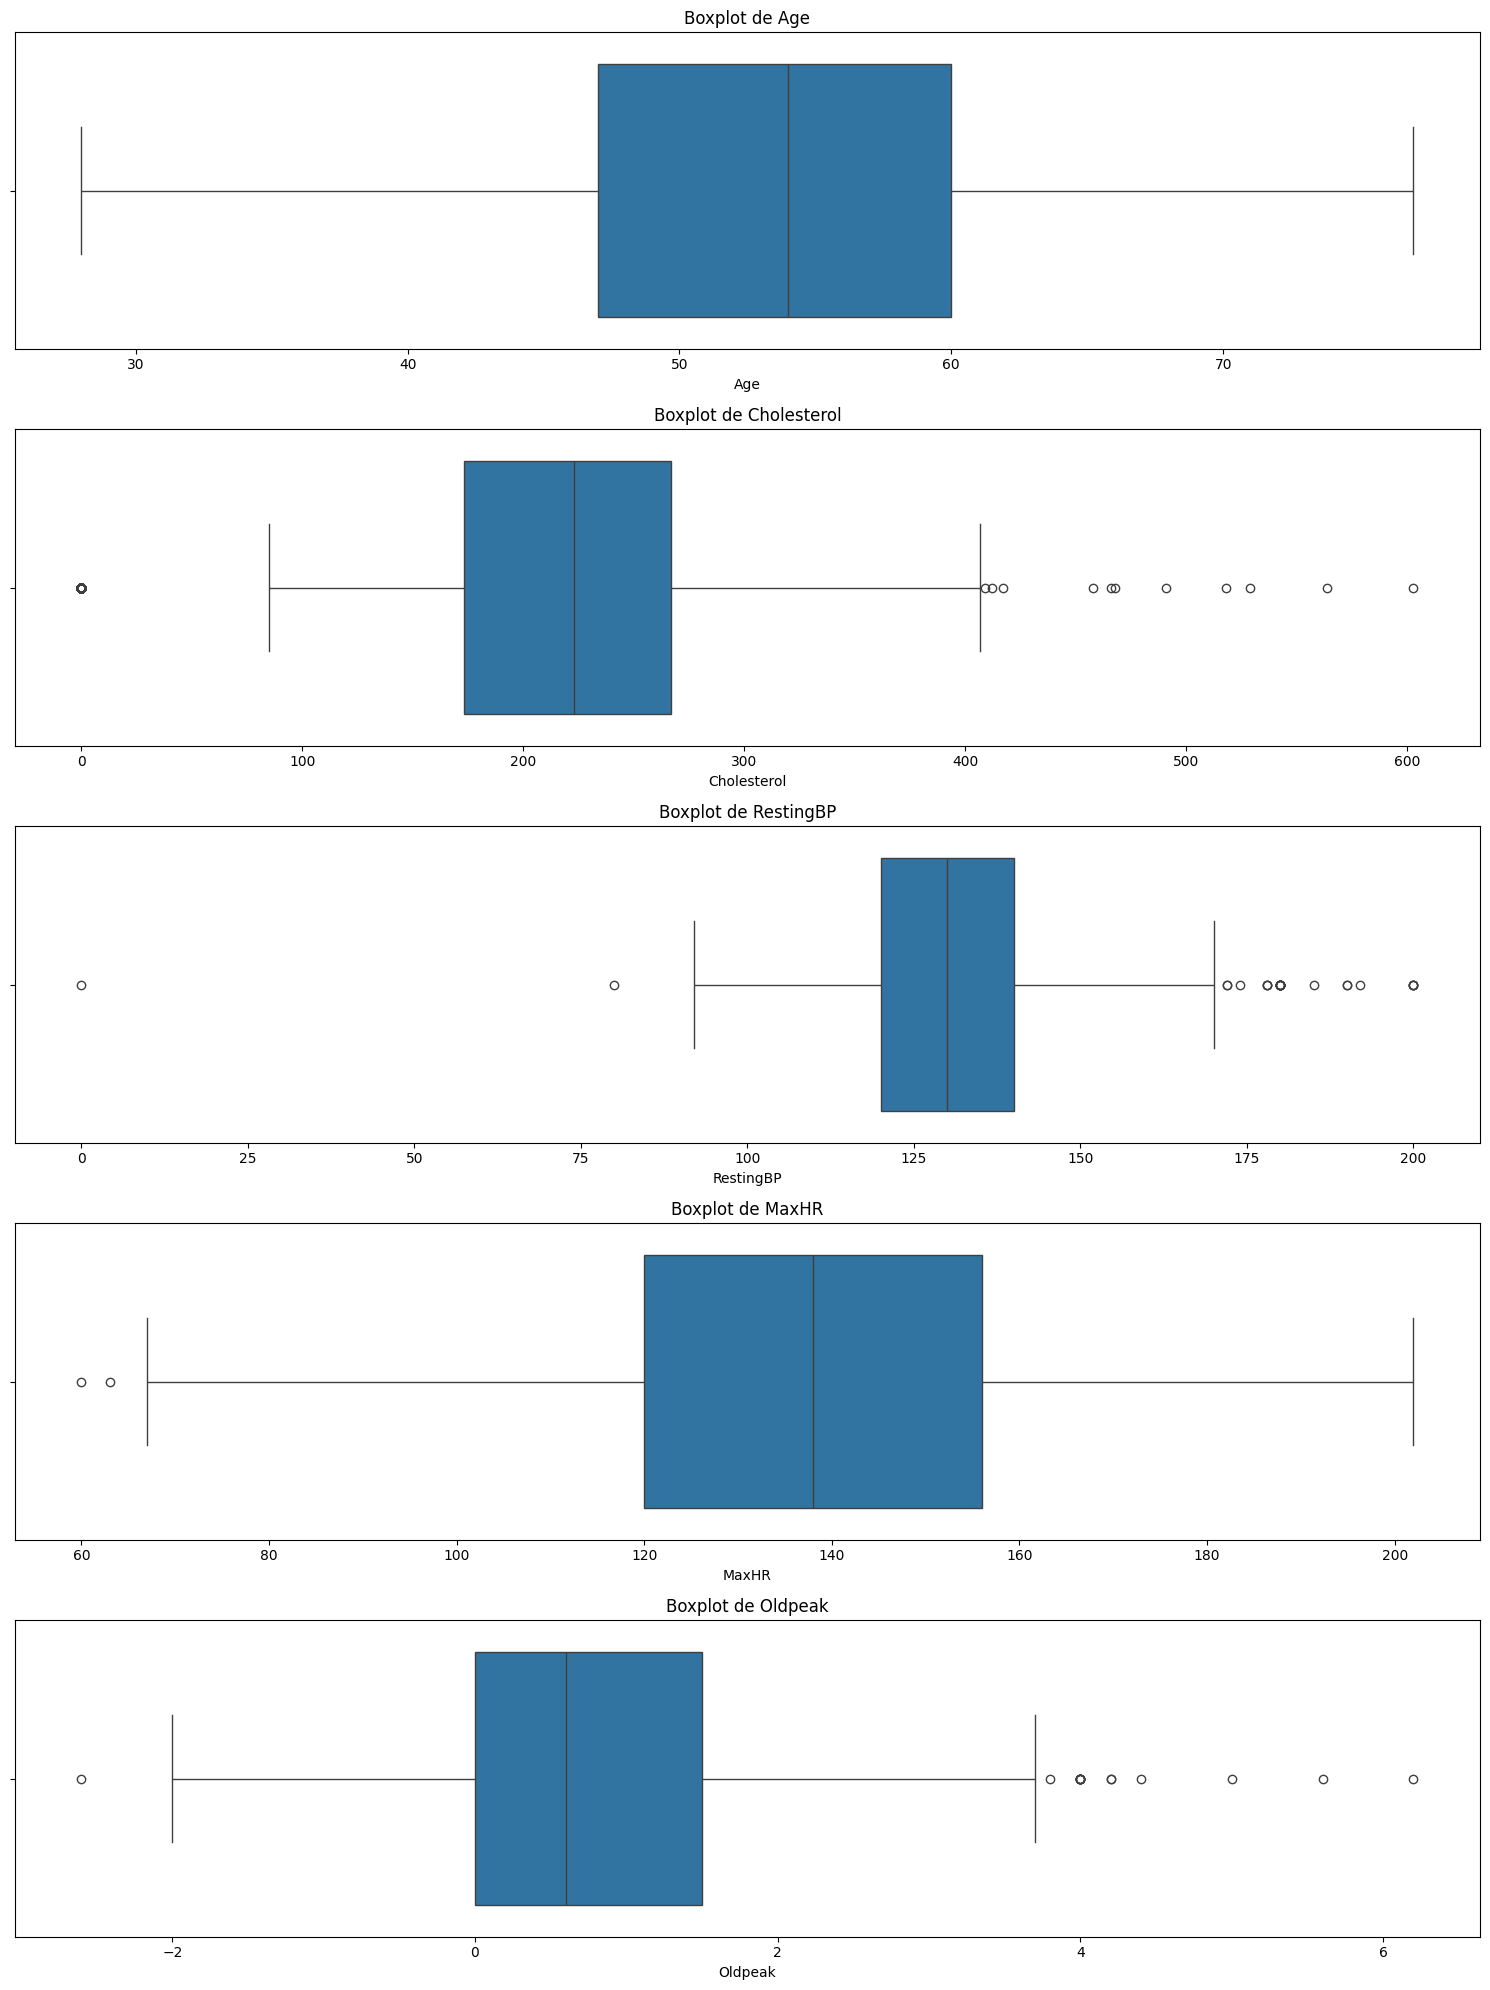

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#como tienen diferentes escalas, hacemos un subplot por cada variable
numeric_columns = ['Age','Cholesterol','RestingBP','MaxHR','Oldpeak']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df_heart[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


Observamos la existencia de outliers en casi todas las variables numéricas continuas y algún dato extraño. En el ámbito de la salud, es esencial considerar el contexto clínico al manejar outliers. Evaluar si representan condiciones reales es crucial antes de decidir eliminarlos o transformarlos. En última instancia, el enfoque que elijas debe estar alineado con tus objetivos de análisis y la interpretación clínica de los datos.

En nuestro caso vamos a mantener los outliers y vamos a filtrar los casos anómalos como es el caso de colesterol igual a 0 y la presión arterial en reposo a 0.

In [10]:
df_heart = df_heart[(df_heart['Cholesterol']>0) & (df_heart['RestingBP']>0)]
df_heart.count()

,0
Age,746
Sex,746
ChestPainType,746
RestingBP,746
Cholesterol,746
FastingBS,746
RestingECG,746
MaxHR,746
ExerciseAngina,746
Oldpeak,746


TAMBIÉN ENCONTRAMOS EL PROBLEMA DE DESBALANCEO DE LA VARIABLE OBJETIVO

In [11]:
df_heart['HeartDisease'].value_counts()

,count
HeartDisease,
0,390
1,356


## 2. Análisis Exploratorio de Datos (EDA)

Realizaremos un análisis exploratorio de los datos para comprender mejor su distribución y correlaciones entre variables. La matriz de correlación se usa para variables numéricas, no para variables categóricas.


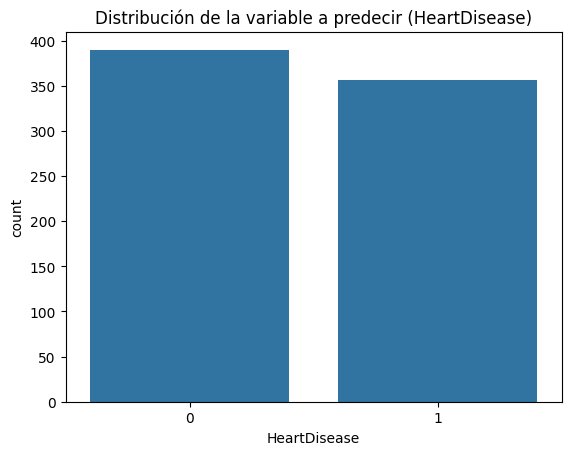

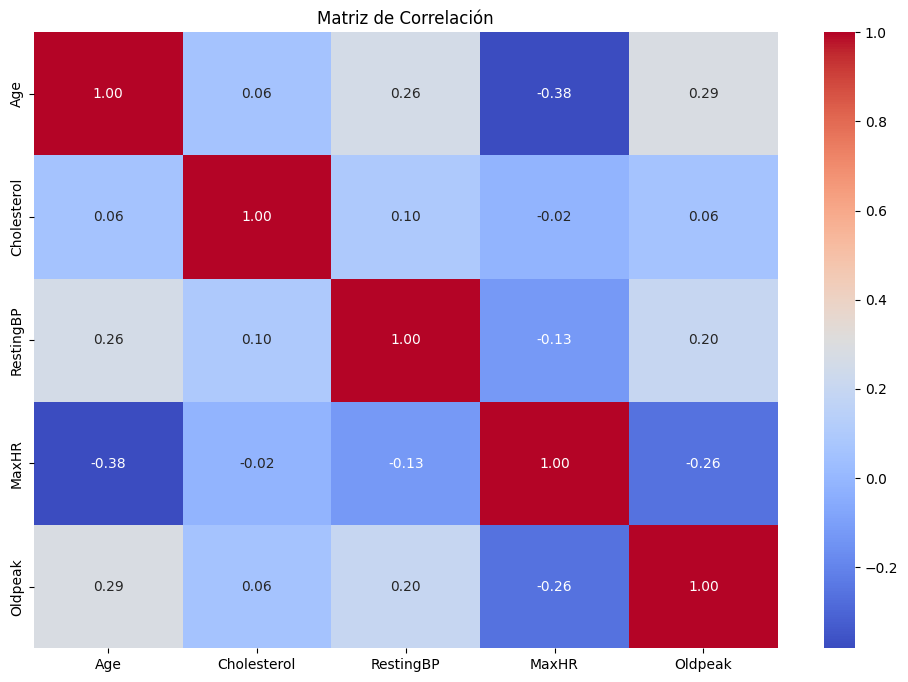

In [12]:
# Distribución de la variable objetivo
sns.countplot(x='HeartDisease', data=df_heart)
plt.title("Distribución de la variable a predecir (HeartDisease)")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_heart[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



## 3. Preprocesamiento de los Datos

En este paso, convertiremos las variables categóricas en numéricas y escalaremos las variables. Utilizaremos `LabelEncoder` para transformar las variables categóricas.


In [13]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_heart = pd.get_dummies(df_heart, columns=categorical_columns)

In [14]:
df_heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Solo transformar el conjunto de prueba
# No se debe aplicar fit transform a todo el conjunto de datos,
# ya que puede provocar el problema denominado fuga de datos

PARA ABORDAR EL PROBLEMA DEL DESBALANCEO REALIZAMOS RESAMPLE, ÚNICAMENTE SOBRE EL CONJUNTO DE ENTRENAMIENTO

In [16]:
!pip install imbalanced-learn

In [17]:
from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento escalado
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Tamaño del conjunto de entrenamiento original:", X_train_scaled.shape[0])
print("Tamaño del conjunto de entrenamiento después de SMOTE:", X_train_smote.shape[0])

Tamaño del conjunto de entrenamiento original: 596
Tamaño del conjunto de entrenamiento después de SMOTE: 638


# SMOTE (Synthetic Minority Over-sampling Technique)

**SMOTE** es una técnica de muestreo utilizada para abordar el problema del desequilibrio en los conjuntos de datos, especialmente en tareas de clasificación. Se aplica cuando una clase (minoritaria) está subrepresentada en comparación con otra clase (mayoritaria), lo que puede llevar a que los modelos de aprendizaje automático tengan un rendimiento deficiente al predecir la clase minoritaria.

## ¿Cómo Funciona SMOTE?

SMOTE crea ejemplos sintéticos en lugar de simplemente duplicar los ejemplos existentes de la clase minoritaria. A continuación se describe el proceso:

1. **Identificación de Ejemplos de la Clase Minoritaria**: Se identifican los ejemplos en la clase minoritaria.

2. **Selección de Vecinos Más Cercanos**: Para cada ejemplo en la clase minoritaria, SMOTE selecciona un número específico de vecinos más cercanos de la misma clase usando una métrica de distancia (normalmente, la distancia Euclidiana).

3. **Generación de Nuevos Ejemplos**: Para cada vecino seleccionado, SMOTE genera un nuevo ejemplo sintético tomando un punto en el espacio entre el ejemplo original y su vecino.

4. **Repetición del Proceso**: Este proceso se repite hasta que se haya alcanzado el número deseado de ejemplos sintéticos para la clase minoritaria.


## 4. Entrenamiento y optimización de múltiples modelos de clasificación

Llegó la hora de jugar. Ahora es vuestro turno y debéis usar la validación cruzada para varios modelos. Me gustaría que fuera obligatorio RandomForest y Regresión Logística. A partir de ahí, debéis usar otros dos modelos ya sean de ensamblado u otro complejo. Obtener los parámetros óptimos para cada modelo mediante la validación cruzada.  

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [19]:
# 1. Definir el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# 2. Definir la cuadrícula de parámetros a buscar
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 3. Configurar la validación cruzada
cv_folds = 5

# 4. Realizar la búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                               cv=cv_folds, scoring='accuracy', n_jobs=-1)

# 5. Ajustar el modelo a los datos de entrenamiento
grid_search_rf.fit(X_train_smote, y_train_smote)

# 6. Obtener el mejor modelo y los mejores parámetros
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# 7. Evaluar el modelo con validación cruzada
cv_scores_rf = cross_val_score(best_rf_model, X_train_smote, y_train_smote, cv=cv_folds)

# 8. Imprimir los resultados
print(f"Mejores parámetros para Random Forest: {best_rf_params}")
print(f"Precisión media con validación cruzada para Random Forest: {np.mean(cv_scores_rf):.4f}")

Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Precisión media con validación cruzada para Random Forest: 0.8683


In [20]:
# 1. Definir el modelo de Regresión Logística
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Definir la cuadrícula de parámetros a buscar
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# 3. Configurar la validación cruzada
cv_folds = 5

# 4. Realizar la búsqueda de hiperparámetros
grid_search_log_reg = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_log_reg,
                                    cv=cv_folds, scoring='accuracy', n_jobs=-1)

# 5. Ajustar el modelo a los datos de entrenamiento
grid_search_log_reg.fit(X_train_smote, y_train_smote)

# 6. Obtener el mejor modelo y los mejores parámetros
best_log_reg_model = grid_search_log_reg.best_estimator_
best_log_reg_params = grid_search_log_reg.best_params_

# 7. Evaluar el modelo con validación cruzada
cv_scores_log_reg = cross_val_score(best_log_reg_model, X_train_smote, y_train_smote, cv=cv_folds)

# 8. Imprimir los resultados
print(f"Mejores parámetros para Regresión Logística: {best_log_reg_params}")
print(f"Precisión media con validación cruzada para Regresión Logística: {np.mean(cv_scores_log_reg):.4f}")

Mejores parámetros para Regresión Logística: {'C': 0.01, 'solver': 'liblinear'}
Precisión media con validación cruzada para Regresión Logística: 0.8574


Ahora implementaremos un modelo de Potenciacion de gradiente

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Definir el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# 2. Definir la cuadrícula de parámetros a buscar
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 3. Configurar la validación cruzada
cv_folds = 5

# 4. Realizar la búsqueda de hiperparámetros
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                               cv=cv_folds, scoring='accuracy', n_jobs=-1)

# 5. Ajustar el modelo a los datos de entrenamiento
grid_search_gb.fit(X_train_smote, y_train_smote)

# 6. Obtener el mejor modelo y los mejores parámetros
best_gb_model = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_

# 7. Evaluar el modelo con validación cruzada
cv_scores_gb = cross_val_score(best_gb_model, X_train_smote, y_train_smote, cv=cv_folds)

# 8. Imprimir los resultados
print(f"Mejores parámetros para Gradient Boosting: {best_gb_params}")
print(f"Precisión media con validación cruzada para Gradient Boosting: {np.mean(cv_scores_gb):.4f}")

Mejores parámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Precisión media con validación cruzada para Gradient Boosting: 0.8558


Implementaré un Modelo de Máquinas de soporte Vectorial

In [22]:
from sklearn.svm import SVC

# 1. Definir el modelo de SVM
svm_model = SVC(random_state=42)

# 2. Definir la cuadrícula de parámetros a buscar
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # 'linear' y 'rbf' son dos de los kernels más comunes
    'gamma': ['scale', 'auto']  # Solo se utiliza si el kernel es 'rbf'
}

# 3. Configurar la validación cruzada
cv_folds = 5

# 4. Realizar la búsqueda de hiperparámetros
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm,
                                cv=cv_folds, scoring='accuracy', n_jobs=-1)

# 5. Ajustar el modelo a los datos de entrenamiento
grid_search_svm.fit(X_train_smote, y_train_smote)

# 6. Obtener el mejor modelo y los mejores parámetros
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

# 7. Evaluar el modelo con validación cruzada
cv_scores_svm = cross_val_score(best_svm_model, X_train_smote, y_train_smote, cv=cv_folds)

# 8. Imprimir los resultados
print(f"Mejores parámetros para SVM: {best_svm_params}")
print(f"Precisión media con validación cruzada para SVM: {np.mean(cv_scores_svm):.4f}")

Mejores parámetros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión media con validación cruzada para SVM: 0.8621


## 5. Análisis de Resultados y Comparación de Modelos

Evaluaremos el rendimiento de cada modelo en el conjunto de prueba usando métricas como **accuracy**, **precisión**, **recall** o **f1-score**. Selección a libre disposición de las métricas.



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
# Supongamos que tienes los siguientes resultados para cada modelo
# Reemplaza estas predicciones con las de tus modelos
y_pred_rf = best_rf_model.predict(X_test_scaled)  # Predicciones de Random Forest
y_pred_log_reg = best_log_reg_model.predict(X_test_scaled)  # Predicciones de Regresión Logística
y_pred_gb = best_gb_model.predict(X_test_scaled)  # Predicciones de Gradient Boosting
y_pred_svm = best_svm_model.predict(X_test_scaled)  # Predicciones de SVM

In [27]:
# Calcular métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [29]:
# Calcular métricas para Regresión Logística
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

In [30]:
# Calcular métricas para Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [31]:
# Calcular métricas para SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [34]:
# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'Regresión Logística', 'Gradient Boosting', 'SVM'],
    'Accuracy': [accuracy_rf, accuracy_log_reg, accuracy_gb, accuracy_svm],
    'Precisión': [precision_rf, precision_log_reg, precision_gb, precision_svm],
    'Recall': [recall_rf, recall_log_reg, recall_gb, recall_svm],
    'F1 Score': [f1_rf, f1_log_reg, f1_gb, f1_svm]
})
print(results_df)

                Modelo  Accuracy  Precisión    Recall  F1 Score
0        Random Forest  0.906667   0.933333  0.886076  0.909091
1  Regresión Logística  0.906667   0.922078  0.898734  0.910256
2    Gradient Boosting  0.913333   0.923077  0.911392  0.917197
3                  SVM  0.886667   0.907895  0.873418  0.890323


Accuracy:

Todos los modelos presentan una alta precisión, con valores superiores al 88%. Sin embargo, el Gradient Boosting tiene la mayor accuracy (0.9133), lo que indica que es el modelo más efectivo en términos de predicciones correctas en el conjunto de prueba.

Precisión:

La precisión mide la proporción de verdaderos positivos sobre todos los positivos predichos. El Random Forest tiene la mayor precisión (0.9333), lo que significa que, entre las predicciones positivas, tiene un alto porcentaje de verdaderos positivos.

Recall:

El recall indica la capacidad del modelo para identificar todos los casos positivos. El Gradient Boosting tiene el mejor recall (0.9114), lo que sugiere que es muy efectivo para detectar los casos positivos reales.

F1 Score:

El F1 Score es una medida que combina precisión y recall. El Gradient Boosting también tiene el mejor F1 Score (0.9172), lo que indica un buen equilibrio entre precisión y recall.

Conclusión
Basado en las métricas analizadas, el Gradient Boosting se destaca como el mejor modelo en este caso, ya que tiene la mayor accuracy, recall y F1 Score. Esto sugiere que es el modelo más equilibrado y robusto para las predicciones en el conjunto de prueba.


 Aunque el Random Forest y la Regresión Logística tienen una accuracy similar, su recall es ligeramente inferior al del Gradient Boosting. El SVM es el que presenta los resultados más bajos en todas las métricas, lo que sugiere que no es tan efectivo para este conjunto de datos específico.

  Dependiendo de la aplicación, podría ser más importante priorizar la precisión o el recall. Por ejemplo, en un problema de detección de enfermedades, un alto recall podría ser más crítico.

  Validación Adicional: Se recomienda realizar una validación adicional, como la validación cruzada, para asegurarse de que los resultados sean consistentes y que el modelo no esté sobreajustado.